# More Pandas Datetime Functions/Variable Types


In [1]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])
# set 'datetime' as the index
df = df.set_index('datetime')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


,date,meantemp,humidity,wind_speed,meanpressure
datetime,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
#Now we will set a time delta of 3 days:
# make the time delta
delta_3d = pd.to_timedelta(3,'D')
delta_3d

Timedelta('3 days 00:00:00')

## Example :
For the most humid day in the weather data, what was the **average wind speed** over the 3 days prior and the 3 days after the most humid day?

In [3]:
#option 1
max_date = df['humidity'].idxmax()
# calc 3 days BEFORE
pre_max = max_date - delta_3d
print(pre_max)

# calc 3 days AFTER
post_max = max_date + delta_3d
post_max

2016-12-29 00:00:00


Timestamp('2017-01-04 00:00:00')

In [4]:
mean_windspeed = df.loc[pre_max:post_max,'wind_speed'].mean()
mean_windspeed

4.89791666675

In [5]:
#option 2
## making a date range to cover the pre-max to post-max window
date_range = pd.date_range(pre_max, post_max)
date_range

DatetimeIndex(['2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01',
               '2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')

## Let's focus on the average temperature ("meantemp")

In [6]:
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

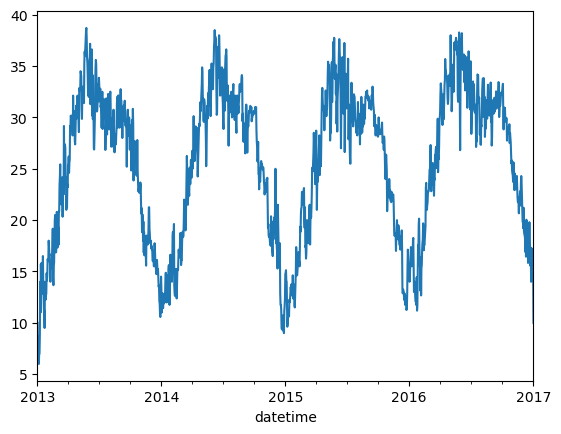

In [7]:
# simple plot
ax = ts.plot();

### Figure Sizes for Time Series
- In general, when we are visualizing time series, we usually want a wider and shorter plot than we typically use.

- To see what is the default figsize used by matplotlib, we can check the values stored in the "rcParams" dictionary in pyplot.

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

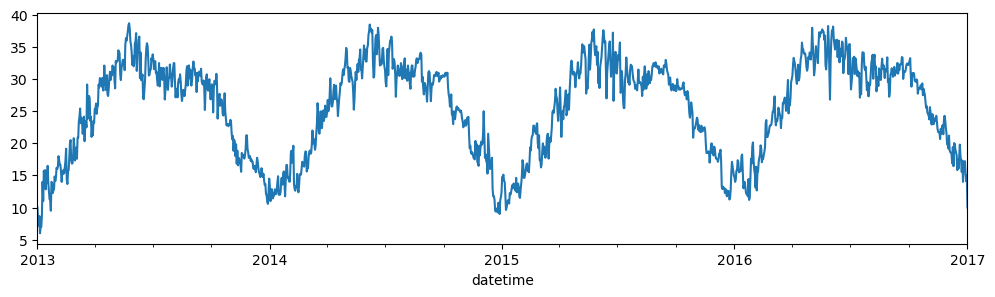

In [9]:
# try sth wider and shorter 
## plot a 12x3 figure
ts.plot(figsize=(12,3));

In [10]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

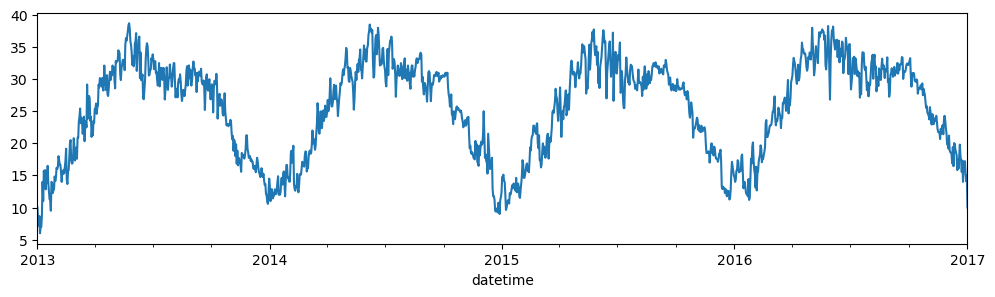

In [11]:
ax = ts.plot();

### Plot - Style/ Level of Detail
If we just want to visualize the dates without the connecting lines, we can add style='.'

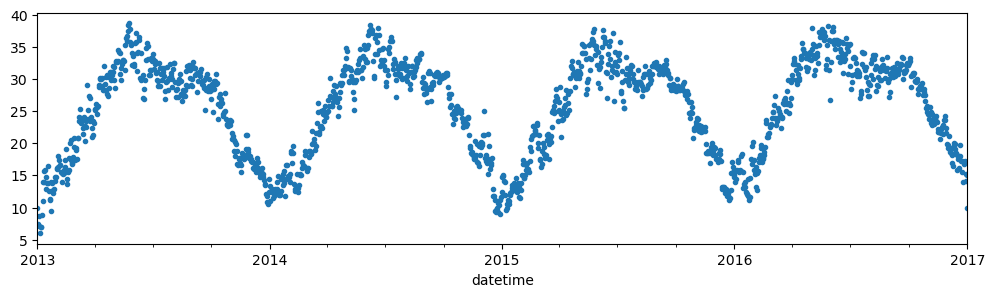

In [12]:
## we can also visualize just the markers without the line
ax = ts.plot(style='.');

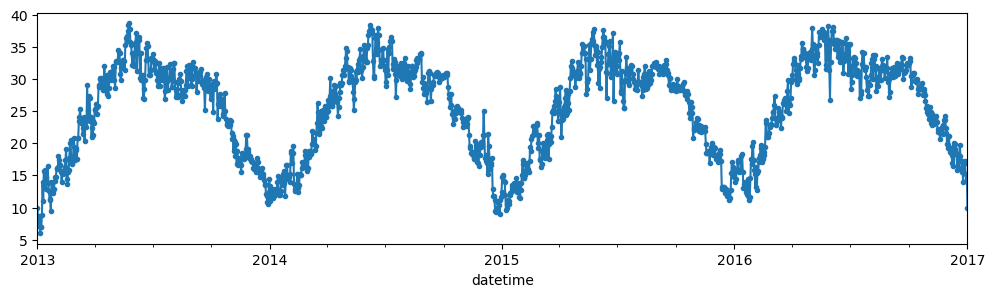

In [13]:
## Using style to add markers
ax = ts.plot(style='.-')

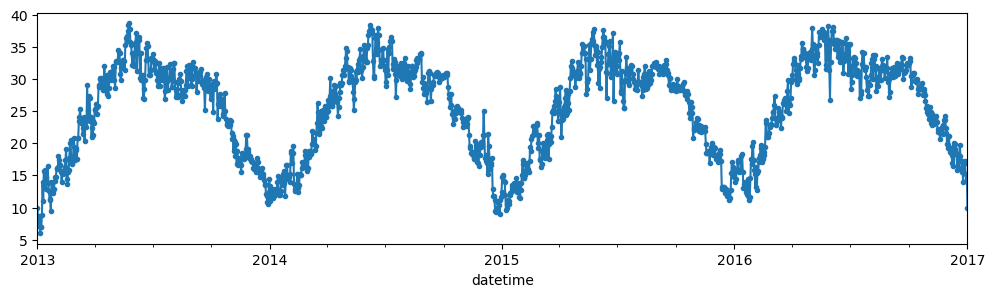

In [14]:
## Using marker to add markers
ax = ts.plot(marker='.')